In [40]:
# %load ../standard_import.txt
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import linregress


%matplotlib inline


### Non Linear Regression

* True underlying models are rarely linear

* Linearity assumption is often "good enough", particularly in:


  * Tackling questions are just not well defined to benefit from more complex models
  
    * Always in search of better models but how much leverage but always evaluate how much more leverage a precise model going to provide 
    
  * Quick prototype simple models that require full interpretability
  

### TellTale or non-linearity - 1

* The model clearly looks non-linear

$$
y = 30 -0.5 x +0.005 x^2 + \epsilon
$$

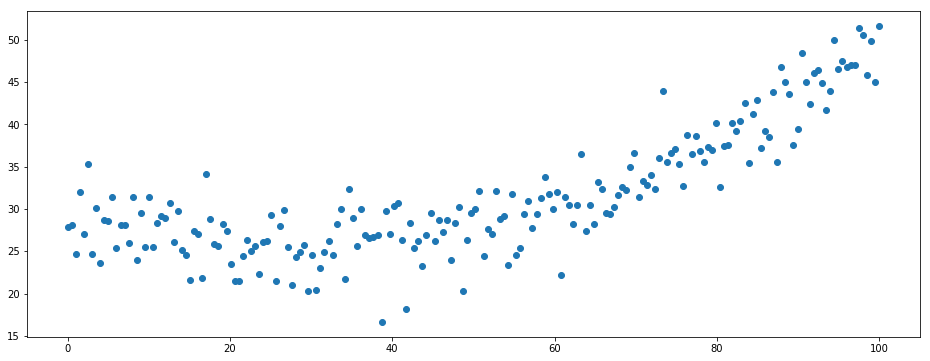

In [26]:
plt.figure(figsize=(16,6))

x = np.linspace(0,100, 200)
errors = np.random.normal(0,3, size=200)
y = 30 + (-0.3 * x)+ (0.005*x**2) +  errors
plt.scatter(x,y)

### TellTale or non-linearity - 2

* Erors terms are not iid
  * Recall that the the assumption is that $\epsilon \sim \mathcal{N}(\mu,\sigma)$
  * this is a violation of the assumption

Text(0.5,1,'Residuals plot')

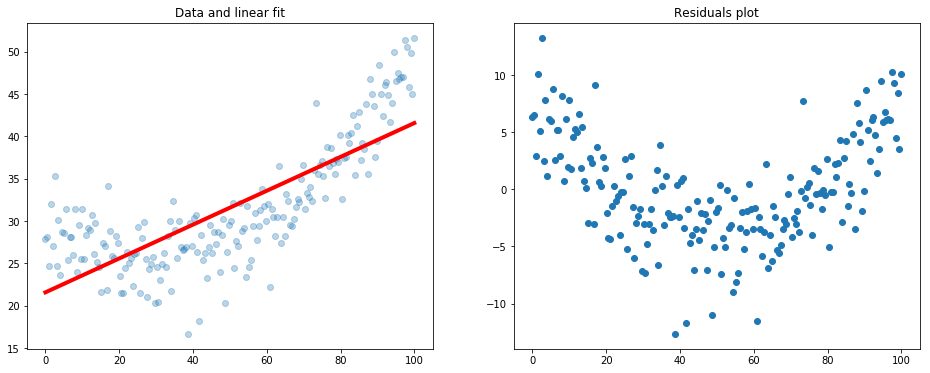

In [47]:

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.scatter(x, y, alpha=0.3)
plt.plot(x, lm.intercept + lm.slope * x, color='r', linewidth=4)
plt.title("Data and linear fit")

lm = linregress(x, y)

RSS_vals = []
for (x_i, y_i) in zip(x,y):
    y_hat = lm.intercept + lm.slope * x_i 
    RSS_vals.append(y_i - y_hat)

plt.subplot(1,2,2)
  
plt.scatter(x, RSS_vals)
plt.title("Residuals plot")


### Non-Linear Models

* How do we handle the case data is clearly non-linear?

* A naive approach is perhaps to compute the model as the average of some points above and below that point 
*  for example, for $x=40$, we need to take 3 observed data points immediately before and after
  * say for instance we take 5 points
 
* This is  called a nearest Neighbor regression



In [60]:
np.searchsorted(x, 70), 

(140,)

In [66]:
x[np.searchsorted(x, 70)]

70.35175879396985

In [67]:
pos = np.searchsorted(x, 70)
x[pos: pos+5]

array([70.35175879, 70.85427136, 71.35678392, 71.85929648, 72.36180905])

In [68]:
pos = np.searchsorted(x, 70)
x[pos-5: pos]

array([67.83919598, 68.34170854, 68.84422111, 69.34673367, 69.84924623])

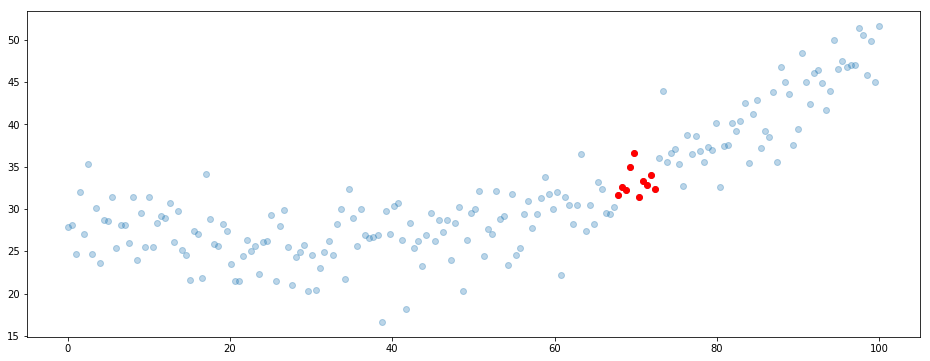

In [72]:
plt.figure(figsize=(16,6))

neighbors = np.arange(pos-5, pos+5)
plt.scatter(x, y, alpha=0.3)
plt.scatter(x[neighbors], y[neighbors], color="red")


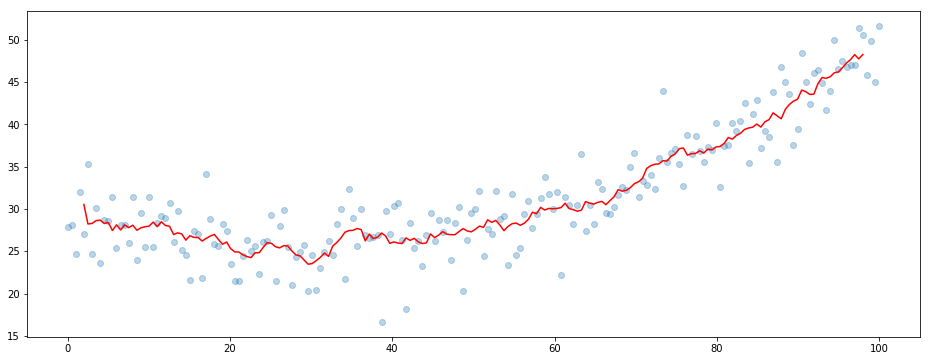

In [91]:
plt.figure(figsize=(16,6))

reg_line = []
for i in x[4:-4]:
    pos = pos = np.searchsorted(x, i)
    neighbors = np.arange(pos-5, pos+5)
    reg_line.append(y[neighbors].mean())

plt.scatter(x, y, alpha=0.3)
plt.plot(x[4:-4], reg_line, color="red")

In [85]:
### Problems with this approach

What are the issues with this approach?


array([47.5013188 , 46.81909131, 47.06711414, 47.08571001, 51.40906646,
       50.52678517, 45.78879276, 49.80585232, 44.99962299, 51.69154057])

### Problems with Nearest Neighbor Regression

* Slow, imagine in the case with a large number of predictors

  * Does not scale well with a large number of parameters

* Highly affected by outliers

* We missing values at the extremities

* We can remedy these shortcomings by discretizing the x-axis

* This is called a step function


### Step Functions

* Break the range of x into bins, and fit a different constant in each bin

  * Such a constant can be `mean` as in nearest neighbors.
 
* This amounts to converting a continuous variable into an ordered categorical variable

In [104]:
intervals = np.split(np.arange(len(x)), 10)
intervals

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39]),
 array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
        57, 58, 59]),
 array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
        77, 78, 79]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
        97, 98, 99]),
 array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119]),
 array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139]),
 array([140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159]),
 array([160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 175, 176, 177, 178, 179]),
 array([180, 181, 182, 183, 184, 185, 

In [105]:
intervals[4]

array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
       97, 98, 99])

In [106]:
x[intervals[4]]

array([40.20100503, 40.70351759, 41.20603015, 41.70854271, 42.21105528,
       42.71356784, 43.2160804 , 43.71859296, 44.22110553, 44.72361809,
       45.22613065, 45.72864322, 46.23115578, 46.73366834, 47.2361809 ,
       47.73869347, 48.24120603, 48.74371859, 49.24623116, 49.74874372])

In [107]:
y[intervals[4]].mean()

26.757190035384856

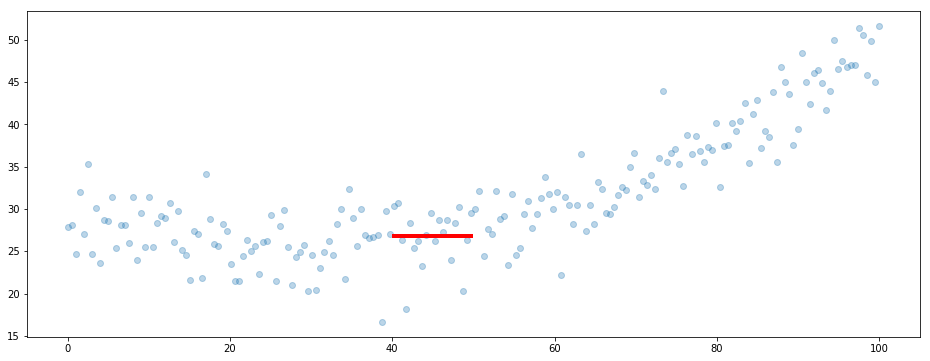

In [110]:
plt.figure(figsize=(16,6))

plt.scatter(x, y, alpha=0.3)
plt.plot(x[intervals[4]], [y[intervals[4]].mean()] * len(intervals[4]), color="red", linewidth=4)


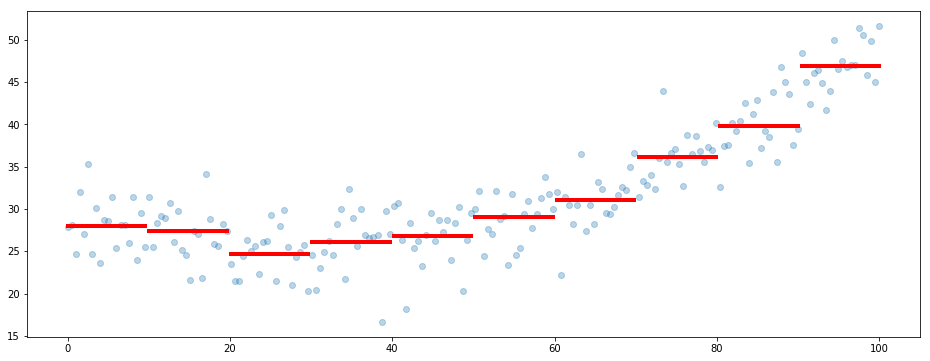

In [112]:
plt.figure(figsize=(16,6))
plt.scatter(x, y, alpha=0.3)
means = []
for i in range(len(intervals)):
    means.append(y[intervals[i]].mean())
    plt.plot(x[intervals[i]], [y[intervals[i]].mean()] * len(intervals[i]), color="red", linewidth=4)



### Shortcoming of Step Function

* How do you interpret sudden changes between two points close on the x-axis?

* Choice of cutpoints or knots can be problematic
  * Arbitrary can lead to substantial variation issues?
  

### Plynomial Regression

* Rather than model the data with a 1st-degree polynomial, we will use a higher degree polynomial 
  * Ex. second, third or even higher if needed

- A 1-degree polynomial
$$
    y = beta_0 + beta_1
$$
- 3-degree polynomial 
$$ 
    y = beta_0 ~~+~~ beta_1 x ~~+~~ beta_2x^2 ~~+~~ beta_3x^3 $

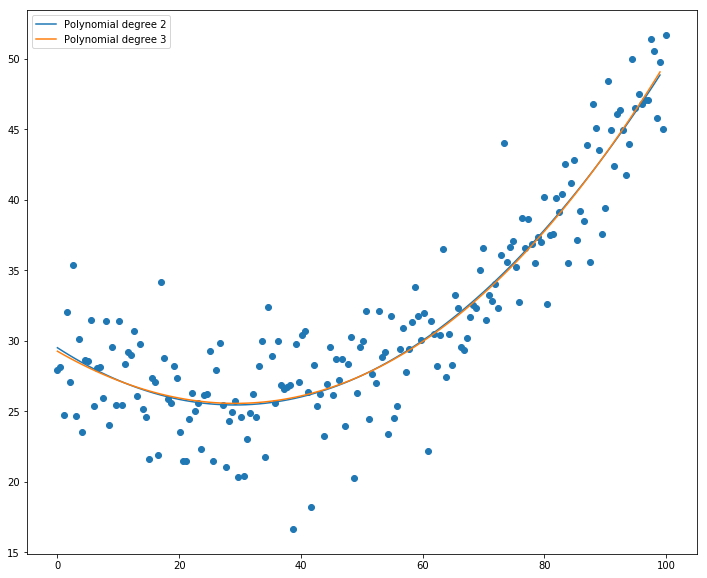

In [136]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

np.random
plt.figure(figsize=(12,10))

plt.scatter(x, y)

x_axis= np.arange(0,max(x)).reshape(-1,1)

fo
r polDegree in [2, 3]:

    poly = PolynomialFeatures(degree=polDegree)
    X_vals_transformed = poly.fit_transform(x.reshape(-1,1))    
    X_axis_transformed = poly.transform(x_axis)

    lin = linear_model.LinearRegression()
    lin.fit(X_vals_transformed, y.reshape(-1,1))
    y_hat =  lin.predict(X_axis_transformed)

    plt.plot(x_axis, y_hat, label= "Polynomial degree %s" % polDegree)
plt.legend() 

In [125]:
x.reshape(-1,1)

array([[  0.        ],
       [  0.50251256],
       [  1.00502513],
       [  1.50753769],
       [  2.01005025],
       [  2.51256281],
       [  3.01507538],
       [  3.51758794],
       [  4.0201005 ],
       [  4.52261307],
       [  5.02512563],
       [  5.52763819],
       [  6.03015075],
       [  6.53266332],
       [  7.03517588],
       [  7.53768844],
       [  8.04020101],
       [  8.54271357],
       [  9.04522613],
       [  9.54773869],
       [ 10.05025126],
       [ 10.55276382],
       [ 11.05527638],
       [ 11.55778894],
       [ 12.06030151],
       [ 12.56281407],
       [ 13.06532663],
       [ 13.5678392 ],
       [ 14.07035176],
       [ 14.57286432],
       [ 15.07537688],
       [ 15.57788945],
       [ 16.08040201],
       [ 16.58291457],
       [ 17.08542714],
       [ 17.5879397 ],
       [ 18.09045226],
       [ 18.59296482],
       [ 19.09547739],
       [ 19.59798995],
       [ 20.10050251],
       [ 20.60301508],
       [ 21.10552764],
       [ 21